In [1]:
import numpy as np
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math
import pywt

In [6]:
#Generate random points
centers = [[1, 1], [-1, -1], [1, -1]]
X, y= make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

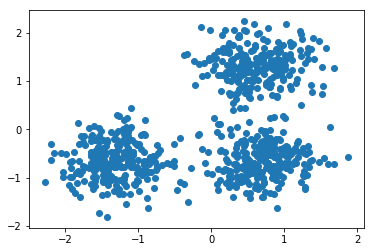

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
#Compute and/or set some variables
n_bins = 8
d = X.shape[1] #number of dimensions

In [9]:
#Create the bins
bin_list = []
for i in list(range(d)):
    dim_min = math.floor(min(X[:,i]))
    dim_max = math.ceil(max(X[:,i]))
    dim_bin = np.linspace(start=dim_min, stop=dim_max, num=n_bins)
    bin_list.append(dim_bin)

In [10]:
bin_list

[array([-3.        , -2.28571429, -1.57142857, -0.85714286, -0.14285714,
         0.57142857,  1.28571429,  2.        ]),
 array([-2.        , -1.28571429, -0.57142857,  0.14285714,  0.85714286,
         1.57142857,  2.28571429,  3.        ])]

In [25]:
#Quantize data into the bins
data_quant = np.empty([])
index_key = []
for b in list(range(d)):
    inds = np.digitize(X[:,b], bin_list[b])
    index_key.append(inds)
    quant = np.bincount(inds)
    np.concatenate(data_quant, quant)

TypeError: only integer scalar arrays can be converted to a scalar index

In [24]:
data_quant

array(0.)

In [12]:
#Perform dwt on quantized data
wp = pywt.WaveletPacket2D(data=data_quant, wavelet='db1', mode='symmetric')

ValueError: setting an array element with a sequence.